In [1]:
import cntk as C
from cntk import load_model

In [3]:

import numpy as np
from PIL import Image as PILImage
from IPython.display import Image
import os
import requests
from io import BytesIO
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:

model_file_path = r'E:\local\cntk-models\AlexNet_ImageNet_CNTK.model'

alexnet_model = load_model(model_file_path)

In [2]:
parameters = alexnet_model.parameters
conv1_params = parameters[7]

RGB
(152, 224)


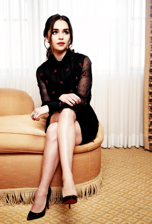

In [119]:
#import matplotlib.image as mpimg
#source_image = mpimg.imread('https://farm1.staticflickr.com/345/31475692524_f89d59d742_b.jpg')
#imgplot = plt.imshow(source_image)

#response = requests.get('https://farm1.staticflickr.com/345/31475692524_f89d59d742_b.jpg')
#response = requests.get('https://68.media.tumblr.com/7885aeb5fa7969bc4f4afb9ed3409eb6/tumblr_olocn7WFC21vkeazao1_1280.jpg')
#source_url = 'https://68.media.tumblr.com/8d5e3fc3f93eaafadcf85c55fbe7ced5/tumblr_orw6xtlACK1vzmputo1_540.jpg'
source_url = 'https://68.media.tumblr.com/4ade8f00e286e7c26465af120cb1344e/tumblr_n9fyy5P0ds1rx8ak3o1_500.jpg'
response = requests.get(source_url)
source_image = PILImage.open(BytesIO(response.content))
print(source_image.mode)
#source_image2 = source_image.resize((int(source_image.width/2), int(source_image.height/2)))
#source_image2 = source_image.resize((224, 224))
source_image2 = source_image.copy()
source_image2.thumbnail((224,224))
print(source_image2.size)
source_image2.save('localimage.png')

Image('localimage.png')
mono_source_image2 = source_image2.convert(mode='L')
mono_source_image2.save('localimage-mono.png')
Image('localimage-mono.png')
display(Image('localimage.png'))

color_planes = source_image2.split()
mono_source_image2_0 = color_planes[0]
mono_source_image2_1 = color_planes[1]
mono_source_image2_2 = color_planes[2]


In [121]:
array_of_source = np.array(source_image2)
print(array_of_source.shape)
print(array_of_source.dtype)
array_of_mono_source = np.array(mono_source_image2)
print(array_of_mono_source.shape)
print(array_of_mono_source.dtype)
conv_mask_from_layer1 = conv1_params.value[95][1]
print(conv_mask_from_layer1.shape)
print(conv_mask_from_layer1.dtype)
print(conv_mask_from_layer1)

array_of_mono_source_0 = np.array(mono_source_image2_0)
array_of_mono_source_1 = np.array(mono_source_image2_1)
array_of_mono_source_2 = np.array(mono_source_image2_2)


(224, 152, 3)
uint8
(224, 152)
uint8
(11, 11)
float32
[[-0.0196941   0.01812091 -0.01171606  0.03304913 -0.03505275 -0.01357912
   0.03713367 -0.0266745   0.0332072  -0.05432191  0.0293942 ]
 [ 0.0193992  -0.01193932 -0.00686511  0.00716311 -0.06987815  0.13772959
  -0.04716133 -0.11091615  0.1124331  -0.01456295 -0.01433235]
 [ 0.04779427 -0.09663673  0.03275482  0.0558542  -0.02579607  0.01014375
  -0.04753259  0.03975394  0.01984379 -0.01217694 -0.01736983]
 [-0.04822949  0.05950547  0.05617591 -0.19496857  0.286744   -0.28646001
  -0.03698459  0.41080534 -0.36049843  0.05298427  0.05077678]
 [-0.03711371  0.12415408 -0.11194868 -0.02120375  0.08553169 -0.06755364
   0.07975967 -0.077264   -0.06444327  0.13929135 -0.07310369]
 [ 0.07038689 -0.10976133 -0.02682837  0.23534721 -0.3033337   0.2004361
   0.10012508 -0.34890643  0.29523769 -0.09338871 -0.00655582]
 [ 0.00998513 -0.0701258   0.11208896 -0.04276375 -0.0874863   0.1338995
  -0.05582892 -0.02523827  0.06104892 -0.08319195  0

In [59]:
# make a filter mask for testing
testfilter = np.zeros((11,11),'float32')
testfilter[5][5] = 4.
testfilter[4][4] = -1
testfilter[6][4] = -1
testfilter[4][6] = -1
testfilter[6][6] = -1
testfilter[5][4] = 1
testfilter[4][5] = 1
testfilter[6][5] = 1
testfilter[5][6] = 1
testfilter[3][5] = -1
testfilter[3][7] = -1
testfilter[5][3] = -1
testfilter[7][3] = -1
testfilter_stack = np.dstack((testfilter,testfilter,testfilter))
print(testfilter)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  4.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [47]:
def make_filter_weight_image(filter_weights, image_file_name, dim=11):
    imstack = np.dstack((filter_weights[0], filter_weights[1], filter_weights[2]))
    # hacky range normalization so we can see something
    immean = imstack.mean()
    #print(immean)
    imstack -= immean
    imstack = imstack * (255.0/imstack.max())
    imstack += 127.
    #print (imstack[0])
    imstack = np.clip(imstack, 0., 255.)
    imint = (imstack * (255.0 / imstack.max())).astype('uint8')
    #imint = imstack.astype('uint8')
    #print(imint[0])
    try:
        os.remove(image_file_name)
    except OSError:
        pass

    im = PILImage.fromarray(imint)
    im2 = im.resize((224,224))
    im2.save(image_file_name)

    

C:\Anaconda3\envs\cntk35\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\cntk35\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in multiply


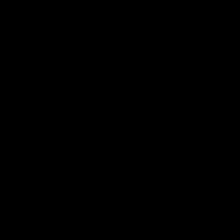

In [60]:
make_filter_weight_image(testfilter, 'testfilter.png', dim=11)
Image('testfilter.png')

In [106]:
print(array_of_mono_source.shape, testfilter.shape)
#filtered_image = signal.convolve2d(array_of_mono_source, testfilter, boundary='symm', mode = 'same')
filtered_image = signal.convolve2d(array_of_mono_source, conv_mask_from_layer1, boundary='symm', mode = 'same')

(367, 250) (11, 11)


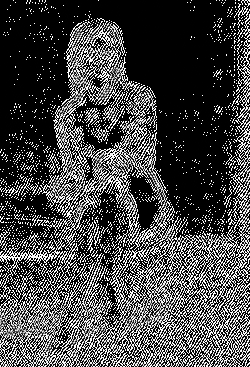

In [107]:
im3 = PILImage.fromarray(filtered_image.astype('uint8'))
im3.save('filtered_out.png')
Image('filtered_out.png')


conv1, filter  95 (304, 448)


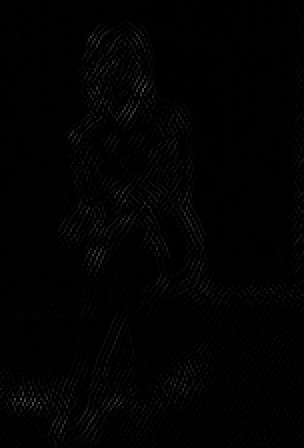

In [126]:
#conv_mask_from_layer1 = conv1_params.value[95][1]
#filtered_image = signal.convolve2d(array_of_mono_source, conv_mask_from_layer1, boundary='symm', mode = 'same')
#im3 = PILImage.fromarray(filtered_image.astype('uint8'))
#im3.save('filtered_out.png')
#Image('filtered_out.png')
from IPython.display import clear_output, display
import time

for i in range(0,96):
    conv_mask0_from_layer1 = conv1_params.value[i][0]
    filtered_image0 = signal.convolve2d(array_of_mono_source_0, conv_mask0_from_layer1, boundary='symm', mode = 'same')
    conv_mask1_from_layer1 = conv1_params.value[i][1]
    filtered_image1 = signal.convolve2d(array_of_mono_source_1, conv_mask1_from_layer1, boundary='symm', mode = 'same')
    conv_mask2_from_layer1 = conv1_params.value[i][2]
    filtered_image2 = signal.convolve2d(array_of_mono_source_2, conv_mask2_from_layer1, boundary='symm', mode = 'same')
    
#    filtered_image = filtered_image0 + filtered_image1 + filtered_image2
#    filtered_image = np.clip(filtered_image, 0., 255.)
    
    filtered_image0 = np.clip(filtered_image0, 0., 255.)
    filtered_image1 = np.clip(filtered_image0, 0., 255.)
    filtered_image2 = np.clip(filtered_image0, 0., 255.)
    filtered_image = np.dstack((filtered_image0,filtered_image1,filtered_image2))
    
    im3 = PILImage.fromarray(filtered_image.astype('uint8'))
    im3 = im3.resize((im3.width*2, im3.height*2))
    im3.save('filtered_out.png')
    clear_output()
    print ('conv1, filter ', i, im3.size)
    display(Image('filtered_out.png'))
    time.sleep(1)
    

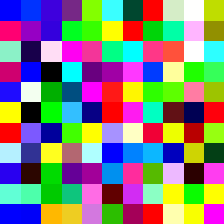

In [141]:
import os
make_filter_weight_image(testweights, 'testfilter.png', dim=11)
Image('testfilter.png')

uint8


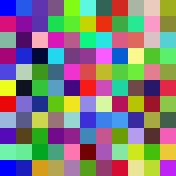

In [76]:
from PIL import Image as PILImage
inttw = twstack.astype('uint8')
print(inttw.dtype)

im = PILImage.fromarray(inttw)
im = im.resize((11*16,11*16))
im.save('testimage.png')
Image('testimage.png')

conv1, filter  94


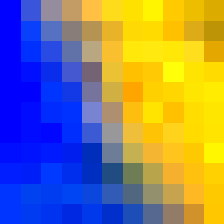

In [81]:
#make_filter_weight_image(testweights, 'testimage2.png', dim=11)
from IPython.display import clear_output, display
import time

print(conv1_params.value[0].shape)
for i in range(0,95):
    make_filter_weight_image(conv1_params.value[i], 'testimage2.png', dim=11)
    clear_output()
    print ('conv1, filter ', i)
    display(Image('testimage2.png'))
    time.sleep(1)
#Image('testimage2.png')

In [146]:
import json
def read_conv1_filter_values(filter_json_file_name):
    f = open (filter_json_file_name)
    filters = list()
    for line in f:
        filters.append(json.loads(line))

#    print(filters)
    return filters



In [147]:
conv1filters = read_conv1_filter_values('AlexNet_ImageNet_CNTK-conv1.json')
len(conv1filters)

96

In [155]:
len(conv1filters[0]['weights'][0][0])

11

In [132]:
conv1filters[0]

{'bias': -0.035389818251132965,
 'i': 0,
 'layer': 'conv1',
 'weights': [[[0.0035063044633716345,
    -0.013895695097744465,
    -0.020732879638671875,
    -0.020718930289149284,
    -0.013473227620124817,
    -0.005862415302544832,
    0.003017171984538436,
    0.027882372960448265,
    0.03413316234946251,
    0.021074077114462852,
    0.026036283001303673],
   [0.018067121505737305,
    -0.00016060806228779256,
    -0.012837309390306473,
    -0.025828111916780472,
    -0.044070299714803696,
    -0.042192187160253525,
    -0.037241581827402115,
    -0.020669737830758095,
    0.021785667166113853,
    0.029764562845230103,
    0.02021818980574608],
   [0.02805887907743454,
    0.02295074425637722,
    0.02018769085407257,
    0.017911968752741814,
    0.002274484606459737,
    -0.03648888319730759,
    -0.06663355231285095,
    -0.08065685629844666,
    -0.06457412242889404,
    -0.013491620309650898,
    0.020037584006786346],
   [0.026322776451706886,
    0.021075431257486343,
    0

In [133]:
conv1filters[0]['bias']

-0.035389818251132965

In [143]:
conv1filters[0]['weights'][2][10][10]

-0.007884329184889793

In [175]:
k0 = np.array(conv1filters[0]['weights'])
biaslist = list()
for filter in conv1filters:
    biaslist.append(filter['bias'])
bias = np.array(biaslist)
print(k0.shape, bias.shape)

(3, 11, 11) (96,)


In [176]:
bias[0]

-0.035389818251132965

In [170]:
k0[0]

array([[  1.73064768e-02,   8.73401295e-03,   1.60441995e-02,
          2.00646892e-02,   2.68514804e-03,   2.85548903e-02,
          4.08663265e-02,   2.69594248e-02,   3.00040692e-02,
          2.39196401e-02,   1.37169054e-02],
       [  1.59432422e-02,   7.28006521e-03,   1.77264232e-02,
          2.10685972e-02,  -4.14992403e-03,   2.39501800e-02,
          3.80039439e-02,   2.14874893e-02,   2.65124664e-02,
          2.44861506e-02,   1.76969636e-02],
       [  1.93274897e-02,   4.88809403e-03,   1.65833905e-02,
          2.45240070e-02,  -6.17939513e-03,   3.36532891e-02,
          3.06074545e-02,   1.43429581e-02,   2.60346290e-02,
          2.06848476e-02,   1.34924660e-02],
       [  1.75296273e-02,   3.79907270e-03,   2.03119963e-02,
          3.12960520e-02,  -1.08226286e-02,   3.06288898e-02,
          2.54144613e-02,   6.97628828e-03,   2.51357425e-02,
          2.04279292e-02,   1.60310194e-02],
       [  1.23166386e-02,   4.90326481e-03,   2.27268431e-02,
          2.96

In [171]:
conv1_params.value[55][0]

array([[  1.73064768e-02,   8.73401295e-03,   1.60441995e-02,
          2.00646892e-02,   2.68514804e-03,   2.85548903e-02,
          4.08663265e-02,   2.69594248e-02,   3.00040692e-02,
          2.39196401e-02,   1.37169054e-02],
       [  1.59432422e-02,   7.28006521e-03,   1.77264232e-02,
          2.10685972e-02,  -4.14992403e-03,   2.39501800e-02,
          3.80039439e-02,   2.14874893e-02,   2.65124664e-02,
          2.44861506e-02,   1.76969636e-02],
       [  1.93274897e-02,   4.88809403e-03,   1.65833905e-02,
          2.45240070e-02,  -6.17939513e-03,   3.36532891e-02,
          3.06074545e-02,   1.43429581e-02,   2.60346290e-02,
          2.06848476e-02,   1.34924660e-02],
       [  1.75296273e-02,   3.79907270e-03,   2.03119963e-02,
          3.12960520e-02,  -1.08226286e-02,   3.06288898e-02,
          2.54144613e-02,   6.97628828e-03,   2.51357425e-02,
          2.04279292e-02,   1.60310194e-02],
       [  1.23166386e-02,   4.90326481e-03,   2.27268431e-02,
          2.96